# Importing Libraries

In [14]:
# generel utility libraries
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

#svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#pca
from sklearn.decomposition import PCA

#pipeline
from sklearn.pipeline import make_pipeline, Pipeline

# Importing Data

In [2]:
train_data = scipy.io.loadmat('mnist_training_data.mat')
train_label = scipy.io.loadmat('mnist_training_label.mat')
print(train_label.keys())
print(train_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'training_label'])
dict_keys(['__header__', '__version__', '__globals__', 'training_data'])


In [3]:
test_data = scipy.io.loadmat('mnist_test_data.mat')
test_label = scipy.io.loadmat('mnist_test_label.mat')
print(test_label.keys())
print(test_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'test_label'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])


In [4]:
X_train = train_data['training_data']
y_train = train_label['training_label'].reshape(-1,)
print(X_train.shape)
print(y_train.shape)

(50000, 784)
(50000,)


In [5]:
X_test = test_data['test_data']
y_test = test_label['test_label'].reshape(-1,)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


# Importing Rotated Data

In [6]:
train_data_rotated = scipy.io.loadmat('mnist-rot_training_data.mat')
train_label_rotated = scipy.io.loadmat('mnist-rot_training_label.mat')
print(train_label_rotated.keys())
print(train_data_rotated.keys())

dict_keys(['__header__', '__version__', '__globals__', 'train_label'])
dict_keys(['__header__', '__version__', '__globals__', 'train_data'])


In [7]:
test_data_rotated = scipy.io.loadmat('mnist-rot_test_data.mat')
test_label_rotated = scipy.io.loadmat('mnist-rot_test_label.mat')
print(test_label_rotated.keys())
print(test_data_rotated.keys())

dict_keys(['__header__', '__version__', '__globals__', 'test_label'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])


In [8]:
X_train_rotated = train_data_rotated['train_data']
y_train_rotated = train_label_rotated['train_label'].reshape(-1,)
print(X_train_rotated.shape)
print(y_train_rotated.shape)

(12000, 28, 28)
(12000,)


In [9]:
X_test_rotated = test_data_rotated['test_data']
y_test_rotated = np.array(test_label_rotated['test_label']).reshape(-1,)
print(X_test_rotated.shape)
print(y_test_rotated.shape)

(10000, 28, 28)
(10000,)


In [10]:
X_train_rotated=X_train_rotated.reshape(12000,-1)
X_train_rotated.shape

(12000, 784)

In [11]:
X_test_rotated=X_test_rotated.reshape(10000,-1)
X_test_rotated.shape

(10000, 784)

# Visualization of Rotated Data

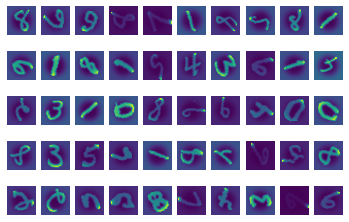

In [12]:
suffle_index=np.random.permutation(range(10000))
j=1
for i in suffle_index[:50]:
    plt.subplot(5,10,j)
    j+=1
    plt.axis('off')
    plt.imshow(X_test_rotated[i].reshape(28,28))

# Processing Rotated Data

In [15]:
mnmx= MinMaxScaler()
X_train_rotated = mnmx.fit_transform(X_train_rotated)
X_test_rotated = mnmx.transform(X_test_rotated)

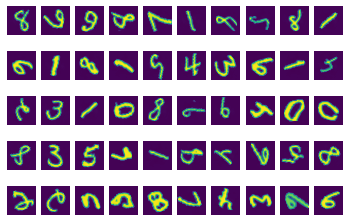

In [16]:
j=1
for i in suffle_index[:50]:
    plt.subplot(5,10,j)
    j+=1
    plt.axis('off')
    plt.imshow(X_test_rotated[i].reshape(28,28))

# Combining Rotated and Unrotated Data

In [17]:
X_train_all=np.vstack([X_train,X_train_rotated])
X_train_all.shape

(62000, 784)

In [18]:
y_train_all=np.vstack([y_train.reshape(-1,1),y_train_rotated.reshape(-1,1)])
y_train_all.shape

(62000, 1)

In [19]:
X_test_all=np.vstack([X_test,X_test_rotated])
X_test_all.shape

(20000, 784)

In [20]:
y_test_all=np.vstack([y_test.reshape(-1,1),y_test_rotated.reshape(-1,1)])
y_test_all.shape

(20000, 1)

# Building Model and Accuracy using combined data

In [21]:
svm_all = make_pipeline( 
    SVC()
)
svm_all.fit(X_train_all,y_train_all.reshape(-1,))
acc_all = svm_all.score(X_train_rotated,y_train_rotated.reshape(-1,))
print(f"Accuracy usnig SVM on Merged Data is {acc_all:.2%}")

Accuracy usnig SVM on Merged Data is 90.25%


# Building Model and Accuracy using combined data using PCA

In [22]:
svm_all_pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.90),
    SVC()
)
svm_all_pca.fit(X_train_all,y_train_all.reshape(-1,))
acc_all_pca = svm_all_pca.score(X_train_rotated,y_train_rotated.reshape(-1,))
print(f"Accuracy usnig SVM on Merged Data after applying PCA is {acc_all_pca:.2%}")

Accuracy usnig SVM on Merged Data after applying PCA is 88.51%
